#### **Escuela Politecnica Nacional del Ecuador**
#### **Nombre:** Moisés Pineda
#### **Fecha:** 01/06/2025

#### **[Tarea 07] Unidad 03-B  splines cúbicos**

#### **Repositorio:** https://github.com/SantiagoTmg/Metodos_Numericos_GRCC1/tree/main/Tareas/%5BTarea%2007%5D%20Unidad%2003-B%20splines%20c%C3%BAbicos

##### **CONJUNTO DE EJERCICIOS**

##### **3. Diríjase al pseudocódigo spline cubico con frontera natural provisto en clase, en base a ese pseudocódigo complete la siguiente función:** 

In [1]:
import sympy as sym
from IPython.display import display

def cubic_spline(xs: list[float], ys: list[float]) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x

    xs = [x for x, _ in points]
    ys = [y for _, y in points]

    n = len(points) - 1  # number of splines

    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * n
    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [1]
    u = [0]
    z = [0]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z.append((alpha[i] - h[i-1] * z[i-1] )/ l[i])

    l.append(1)
    z.append(0)
    c = [0] * (n + 1)

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S  = a + b * (x-xs[j]) + c[j] * (x-xs[j])**2 + d * (x-xs[j])**3

        splines.append(S)
    splines.reverse()
    return splines

##### **4.	Usando la función anterior, encuentre el spline cubico para:**

##### $xs = [1, 2, 3]$ y $ys = [2, 3, 5]$

In [2]:
xs = [1, 2, 3]
ys = [2, 3, 5]

splines = cubic_spline(xs=xs, ys=ys)
_ = [display(s) for s in splines]
print("______")
_ = [display(s.expand()) for s in splines]

1 3 1.5 0.75 -0.25
0 2 0.75 0.0 0.25


0.75*x + 0.25*(x - 1)**3 + 1.25

1.5*x - 0.25*(x - 2)**3 + 0.75*(x - 2)**2

______


0.25*x**3 - 0.75*x**2 + 1.5*x + 1.0

-0.25*x**3 + 2.25*x**2 - 4.5*x + 5.0

##### **5.	Usando la función anterior, encuentre el spline cubico para:**

##### $xs = [0, 1, 2, 3]$ y $ys = [-1, 1, 5, 2]$

In [3]:
xs_1 = [0, 1, 2, 3]
ys_1 = [-1, 1, 5, 2]

splines_1 = cubic_spline(xs=xs_1, ys=ys_1)
_ = [display(s) for s in splines_1]
print("______")
_ = [display(s.expand()) for s in splines_1]

2 5 1.0 -6.0 2.0
1 1 4.0 3.0 -3.0
0 -1 1.0 0.0 1.0


1.0*x**3 + 1.0*x - 1

4.0*x - 3.0*(x - 1)**3 + 3.0*(x - 1)**2 - 3.0

1.0*x + 2.0*(x - 2)**3 - 6.0*(x - 2)**2 + 3.0

______


1.0*x**3 + 1.0*x - 1

-3.0*x**3 + 12.0*x**2 - 11.0*x + 3.0

2.0*x**3 - 18.0*x**2 + 49.0*x - 37.0

##### **6.	Use la función cubic_spline_clamped, provista en el enlace de Github, para graficar los datos de la siguiente tabla.**

In [2]:
def cubic_spline_clamped(
    xs: list[float], ys: list[float], B0: float, B1: float
) -> list[sym.Symbol]:
    """
    Cubic spline interpolation ``S``. Every two points are interpolated by a cubic polynomial
    ``S_j`` of the form ``S_j(x) = a_j + b_j(x - x_j) + c_j(x - x_j)^2 + d_j(x - x_j)^3.``

    xs must be different  but not necessarily ordered nor equally spaced.

    ## Parameters
    - xs, ys: points to be interpolated
    - B0, B1: derivatives at the first and last points

    ## Return
    - List of symbolic expressions for the cubic spline interpolation.
    """

    points = sorted(zip(xs, ys), key=lambda x: x[0])  # sort points by x
    xs = [x for x, _ in points]
    ys = [y for _, y in points]
    n = len(points) - 1  # number of splines
    h = [xs[i + 1] - xs[i] for i in range(n)]  # distances between  contiguous xs

    alpha = [0] * (n + 1)  # prealloc
    alpha[0] = 3 / h[0] * (ys[1] - ys[0]) - 3 * B0
    alpha[-1] = 3 * B1 - 3 / h[n - 1] * (ys[n] - ys[n - 1])

    for i in range(1, n):
        alpha[i] = 3 / h[i] * (ys[i + 1] - ys[i]) - 3 / h[i - 1] * (ys[i] - ys[i - 1])

    l = [2 * h[0]]
    u = [0.5]
    z = [alpha[0] / l[0]]

    for i in range(1, n):
        l += [2 * (xs[i + 1] - xs[i - 1]) - h[i - 1] * u[i - 1]]
        u += [h[i] / l[i]]
        z += [(alpha[i] - h[i - 1] * z[i - 1]) / l[i]]

    l.append(h[n - 1] * (2 - u[n - 1]))
    z.append((alpha[n] - h[n - 1] * z[n - 1]) / l[n])
    c = [0] * (n + 1)  # prealloc
    c[-1] = z[-1]

    x = sym.Symbol("x")
    splines = []
    for j in range(n - 1, -1, -1):
        c[j] = z[j] - u[j] * c[j + 1]
        b = (ys[j + 1] - ys[j]) / h[j] - h[j] * (c[j + 1] + 2 * c[j]) / 3
        d = (c[j + 1] - c[j]) / (3 * h[j])
        a = ys[j]
        print(j, a, b, c[j], d)
        S = a + b * (x - xs[j]) + c[j] * (x - xs[j]) ** 2 + d * (x - xs[j]) ** 3

        splines.append(S)
    splines.reverse()
    return splines

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import lambdify

def plot_splines(splines, intervals, points, title="Interpolación por Splines Cúbicos"):
    """
    Plot cubic splines and interpolation points
    """
    plt.figure(figsize=(10, 6))


    xs = [x for x, _ in points]
    ys = [y for _, y in points]


    plt.scatter(xs, ys, color='red', s=100, zorder=3, label='Puntos de interpolación')


    x_sym = sym.Symbol('x')
    for j, (S, (x_start, x_end)) in enumerate(zip(splines, zip(intervals[:-1], intervals[1:]))):
        x_range = np.linspace(x_start, x_end, 100)
        S_func = lambdify(x_sym, S, 'numpy')
        y_vals = S_func(x_range)
        plt.plot(x_range, y_vals, label=f'S_{j}(x)')

    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('S(x)')
    plt.legend()
    plt.grid(True)
    plt.show()

##### **Tabla 1**

7 6.7 -0.3381314976116886 -0.07593425119415571 0.0057417813992694635
6 7.1 0.04846024164091059 -0.052929661890044014 -0.0025560654782346335
5 6.6 0.5472201929380908 -0.19645031375854607 0.023920108644750342
4 5.7 1.4091093003652708 -0.665438793668634 0.15632949330336265
3 4.2 1.0163426056008245 1.0582054884330803 -0.5745480940339047
2 3.9 -0.07447972276856785 0.03261683993631198 0.3418628828322561
1 3.7 0.4468099653460711 -0.20638006930785827 0.02655521213824114
0 3.0 1.0 -0.3468099653460706 0.046809965346070785


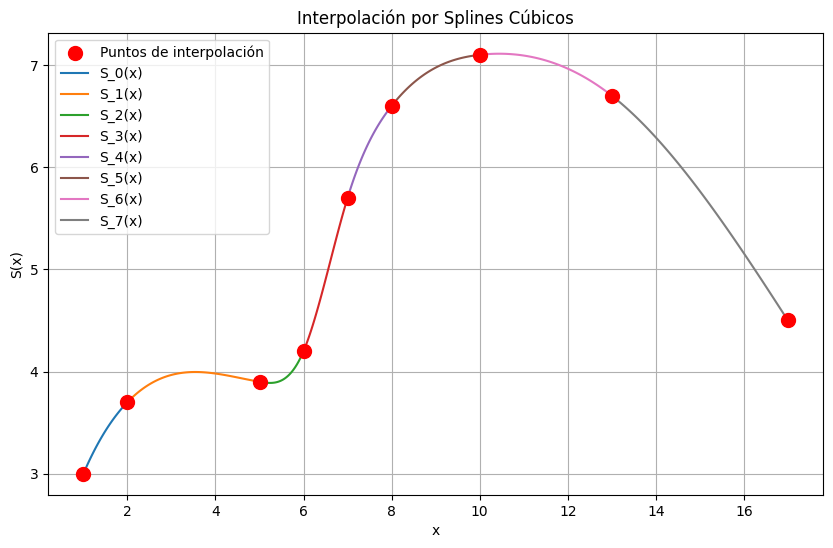


Ecuaciones de los splines:
S_0(x) = 0.0468099653460708*x**3 - 0.487239861384283*x**2 + 1.83404982673035*x + 1.60638006930786
S_1(x) = 0.0265552121382411*x**3 - 0.365711342137305*x**2 + 1.5909927882364*x + 1.7684180949705
S_2(x) = 0.341862882832256*x**3 - 5.09532640254753*x**2 + 25.2390680902875*x - 37.6450407417814
S_3(x) = -0.574548094033905*x**3 + 11.4000711810434*x**2 - 73.7333174112578*x + 160.299730261309
S_4(x) = 0.156329493303363*x**3 - 3.94835815303925*x**2 + 33.7056879273205*x - 90.3912821953733
S_5(x) = 0.0239201086447503*x**3 - 0.770532921232554*x**2 + 8.28308607286689*x - 22.5976772501638
S_6(x) = -0.00255606547823463*x**3 + 0.023752302456995*x**2 + 0.340233835971401*x + 3.87849687282113
S_7(x) = 0.00574178139926946*x**3 - 0.299863725765665*x**2 + 4.54724220286598*x - 14.3518727170554


In [4]:
xs = [1, 2, 5, 6, 7, 8, 10, 13, 17]
ys = [3.0, 3.7, 3.9, 4.2, 5.7, 6.6, 7.1, 6.7, 4.5]

sorted_points = sorted(zip(xs, ys), key=lambda x: x[0])
sorted_xs = [x for x, _ in sorted_points]
sorted_ys = [y for _, y in sorted_points]

splines = cubic_spline_clamped(xs=sorted_xs, ys=sorted_ys, B0=1.0, B1=-0.67)

intervals = sorted_xs
points = sorted_points

plot_splines(splines, intervals, points)

print("\nEcuaciones de los splines:")
for i, s in enumerate(splines):
    print(f"S_{i}(x) = {s.simplify()}")

##### **Tabla 2**

5 5.2 -0.4011781849199465 0.1258152222202451 -2.568002126658778
4 5.8 0.1539868142803838 -0.4033977218204103 0.08820215734010924
3 5.6 -0.11137135038117751 0.6687558864819717 -0.35738453610079396
2 6.1 -0.6085014127556733 -0.17162582410747595 0.2801272368631492
1 7.0 -0.19787464681108174 0.03475023545927881 -0.022930673285194974
0 4.5 3.0 -1.1007084510629728 0.12616207628025017


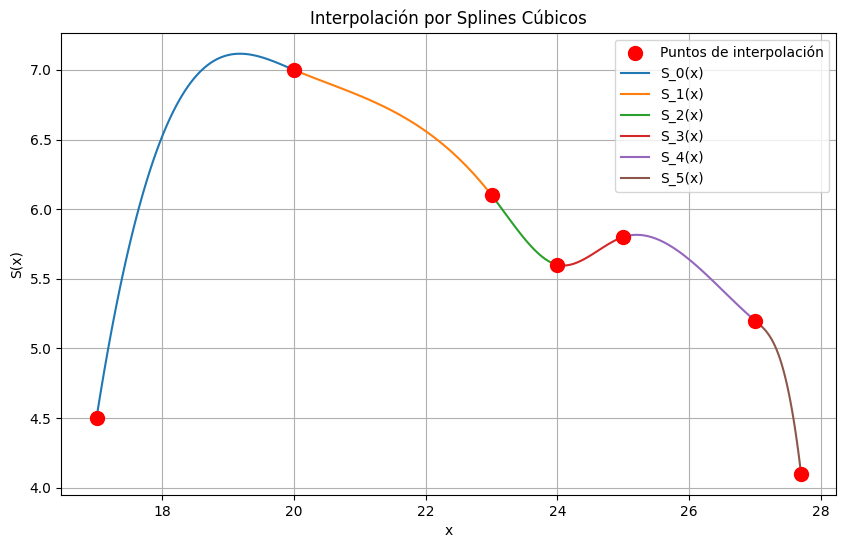


Ecuaciones de los splines:
S_0(x) = 0.12616207628025*x**3 - 7.53497434135573*x**2 + 149.806607471118*x - 984.439023122068
S_1(x) = -0.022930673285195*x**3 + 1.41059063257098*x**2 - 29.1046920074162*x + 208.302973401493
S_2(x) = 0.280127236863149*x**3 - 19.5004051676648*x**2 + 451.848211398006*x - 3479.00261937341
S_3(x) = -0.357384536100794*x**3 + 26.4004424857391*x**2 - 649.772132283688*x + 5333.96013008014
S_4(x) = 0.0882021573401092*x**3 - 7.0185595223286*x**2 + 185.702917918006*x - 1628.33195493397
S_5(x) = -2.56800212665878*x**3 + 208.133987481581*x**2 - 5623.41585118756*x + 50653.7369670161


In [5]:
xs_1 = [17, 20, 23, 24, 25, 27, 27.7]
ys_1 = [4.5, 7.0, 6.1, 5.6, 5.8, 5.2, 4.1]

sorted_points = sorted(zip(xs_1, ys_1), key=lambda x: x[0])
sorted_xs = [x for x, _ in sorted_points]
sorted_ys = [y for _, y in sorted_points]

splines = cubic_spline_clamped(xs=sorted_xs, ys=sorted_ys, B0=3.0, B1=-4.0)

intervals = sorted_xs
points = sorted_points

plot_splines(splines, intervals, points)

print("\nEcuaciones de los splines:")
for i, s in enumerate(splines):
    print(f"S_{i}(x) = {s.simplify()}")

##### **Tabla 3**

2 4.1 -0.7653465346534649 -0.26930693069306927 -0.06534653465346556
1 4.3 0.6613861386138599 -1.1574257425742556 0.2960396039603954
0 4.1 0.3299999999999999 2.2620462046204524 -3.799413274660778


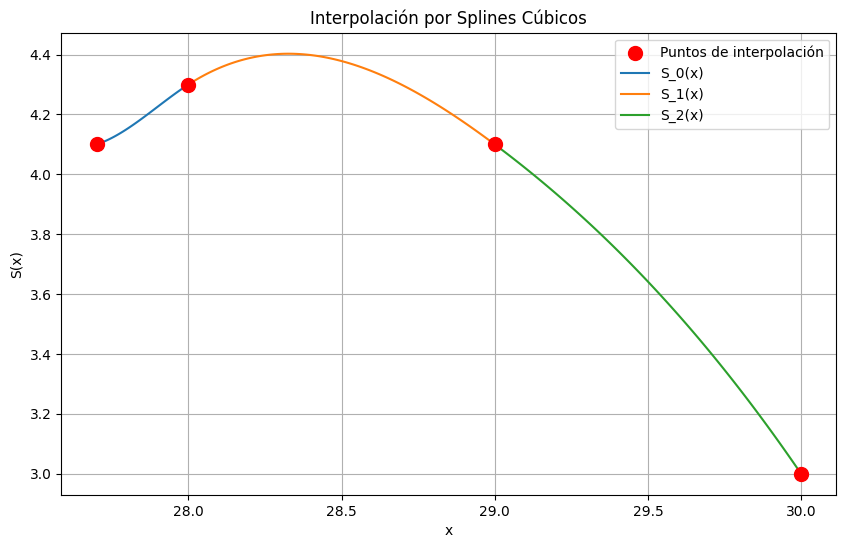


Ecuaciones de los splines:
S_0(x) = -3.79941327466078*x**3 + 317.993289328931*x**2 - 8870.74279427938*x + 82483.079611294
S_1(x) = 0.296039603960395*x**3 - 26.0247524752475*x**2 + 761.762376237622*x - 7420.30198019801
S_2(x) = -0.0653465346534656*x**3 + 5.41584158415843*x**2 - 150.014851485149*x + 1393.54455445545


In [6]:
xs_2 = [27.7, 28, 29, 30]
ys_2 = [4.1, 4.3, 4.1, 3.0]

sorted_points = sorted(zip(xs_2, ys_2), key=lambda x: x[0])
sorted_xs = [x for x, _ in sorted_points]
sorted_ys = [y for _, y in sorted_points]

splines = cubic_spline_clamped(xs=sorted_xs, ys=sorted_ys, B0=0.33, B1=-1.5)

intervals = sorted_xs
points = sorted_points

plot_splines(splines, intervals, points)

print("\nEcuaciones de los splines:")
for i, s in enumerate(splines):
    print(f"S_{i}(x) = {s.simplify()}")